# **Cirrhosis Survival Prediction**








# **1.Problem statement**



The primary goal is to analyze and leverage a dataset containing various health indicators of patients to improve patient care and medical research. The dataset includes information on patient demographics, medical conditions, lab results, and treatment details

# **2.Data loading & Description**

 The Description of the dataset used for the Project

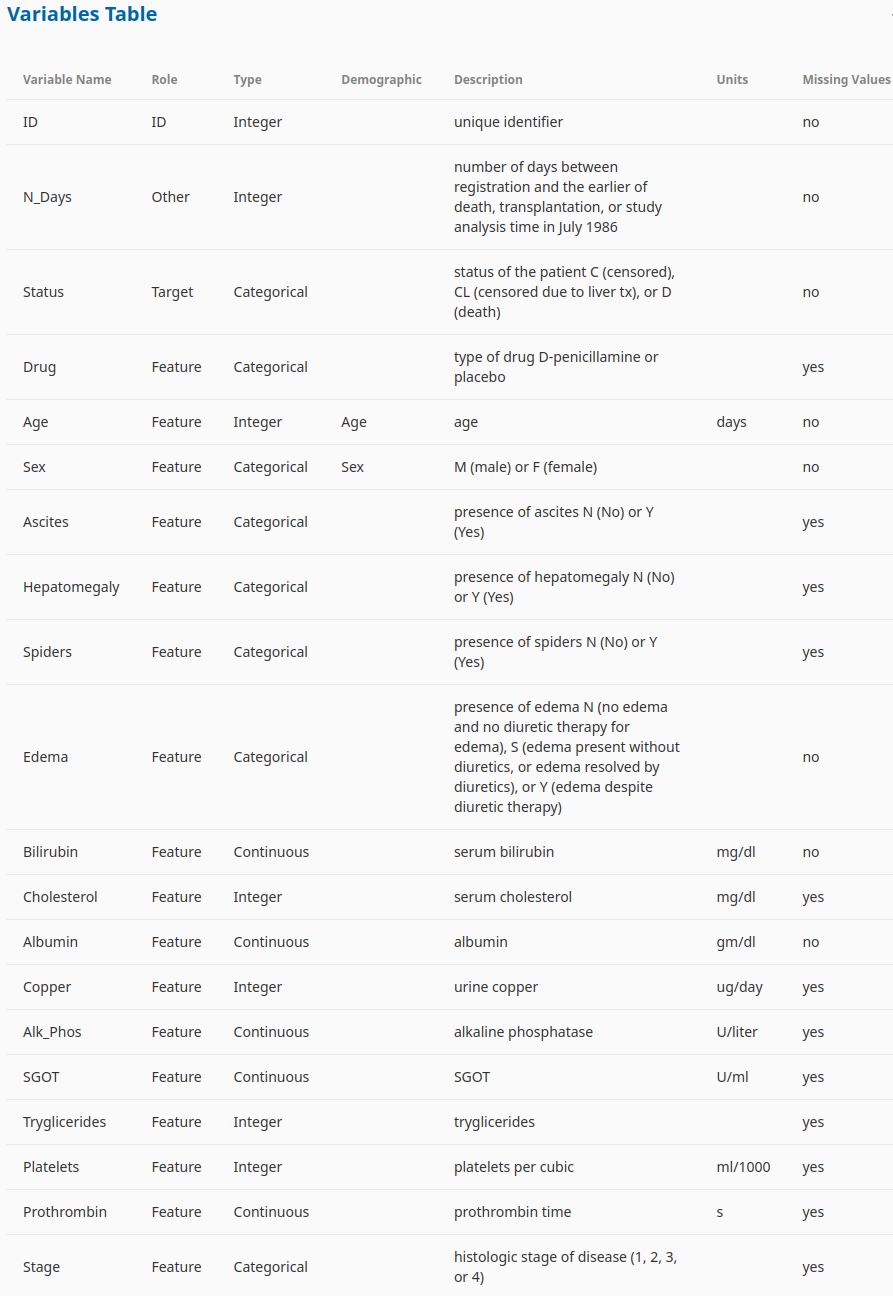

In [ ]:
#  import warnings
import warnings
warnings.filterwarnings('ignore')

## 2.1 Importing necessary libraries

In [ ]:
# for manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import LabelEncoder

# for splitting data
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# boosting techniques
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#  for cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# checking model performence
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.2 Importing Dataset

In [ ]:
cirrhosis=pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")
pd.set_option("display.max_rows",None)              #displaying all rows
pd.set_option("display.max_columns",None)           #displaying all columns
cirrhosis

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


# 2.3 Understanding the Dataset

In [ ]:
cirrhosis.shape         # This will print the number of rows and number of columns

(418, 20)

The dataset contains 418 rows and 20 columns



In [ ]:
cirrhosis.columns       # This will print the column names

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
cirrhosis.info()          #This will give Index, Data types and memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
cirrhosis.head()          #This will print the first 5 rows

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
cirrhosis.tail()          #This will print the last 5 rows

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [ ]:
cirrhosis.describe(include="all")         #This will give statistical information about the dataset

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209.500000,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


In [ ]:
cirrhosis.isnull().sum()          #This will give the count of null values in each column

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

From above output we can see that Tryglicerides, Alk_Phos, SGOT, Copper,Alk_Phos ,Copper, Cholesterol,Spiders, Hepatomegaly, Ascites and Drug coulmns contains maximum null values. we will see how to deal with them

In [ ]:
cirrhosis=cirrhosis.iloc[:313,:]          # Dropping the rows which contain maximum null values

In [ ]:
cirrhosis.shape                           # shape after dropping the null values

(313, 20)

# 2.4 Data Preprocessing

In [ ]:
cirrhosis.isnull().sum()          #This will give the count of null values in each column after dropping of rows

ID                0
N_Days            0
Status            0
Drug              1
Age               0
Sex               0
Ascites           1
Hepatomegaly      1
Spiders           1
Edema             0
Bilirubin         0
Cholesterol      29
Albumin           0
Copper            3
Alk_Phos          1
SGOT              1
Tryglicerides    31
Platelets         4
Prothrombin       0
Stage             1
dtype: int64

In [ ]:
#Counting missing values in each column
total=cirrhosis.isnull().sum().sort_values(ascending=False)
percent=cirrhosis.isnull().sum()/cirrhosis.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data


,total,percent
Tryglicerides,31,9.904153
Cholesterol,29,9.265176
Platelets,4,1.277955
Copper,3,0.958466
Stage,1,0.319489
Drug,1,0.319489
Ascites,1,0.319489
Hepatomegaly,1,0.319489
Spiders,1,0.319489
SGOT,1,0.319489


In [ ]:
#The below lines fill the missing values
cirrhosis["Stage"].fillna(cirrhosis["Stage"].mean(),inplace=True)
cirrhosis["Platelets"].fillna(cirrhosis["Platelets"].mean(),inplace=True)
cirrhosis["Alk_Phos"].fillna(cirrhosis["Alk_Phos"].mean(),inplace=True)
cirrhosis["SGOT"].fillna(cirrhosis["SGOT"].mean(),inplace=True)
cirrhosis['Spiders'] = cirrhosis['Spiders'].apply(lambda x: np.random.choice(cirrhosis['Spiders'].dropna()) if pd.isnull(x) else x)
cirrhosis['Hepatomegaly'] = cirrhosis['Hepatomegaly'].apply(lambda x: np.random.choice(cirrhosis['Hepatomegaly'].dropna()) if pd.isnull(x) else x)
cirrhosis['Drug'] = cirrhosis['Drug'].apply(lambda x: np.random.choice(cirrhosis['Drug'].dropna()) if pd.isnull(x) else x)
cirrhosis["Ascites"][211:421].interpolate(method="ffill",inplace=True)
cirrhosis["Copper"].fillna(cirrhosis["Copper"].mean(),inplace=True)
cirrhosis["Cholesterol"].fillna(cirrhosis["Cholesterol"].mean(),inplace=True)
cirrhosis["Tryglicerides"].fillna(cirrhosis["Tryglicerides"].mean(),inplace=True)

In [ ]:
# Counting missing values after filling
total=cirrhosis.isnull().sum().sort_values(ascending=False)
percent=cirrhosis.isnull().sum()/cirrhosis.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data

,total,percent
ID,0,0.0
N_Days,0,0.0
Prothrombin,0,0.0
Platelets,0,0.0
Tryglicerides,0,0.0
SGOT,0,0.0
Alk_Phos,0,0.0
Copper,0,0.0
Albumin,0,0.0
Cholesterol,0,0.0


In [ ]:
print(cirrhosis.nunique())        #This will give the number of unique values in each column

ID               313
N_Days           302
Status             3
Drug               2
Age              309
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         85
Cholesterol      202
Albumin          135
Copper           159
Alk_Phos         296
SGOT             180
Tryglicerides    147
Platelets        212
Prothrombin       44
Stage              5
dtype: int64


# **3.Exploratory Data Analysis**

In [ ]:
cirrhosis1=cirrhosis.copy()

In [ ]:
cirrhosis1["Status"].value_counts()           #This will give count of Unique values in target column (Status)

Status
C     169
D     125
CL     19
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

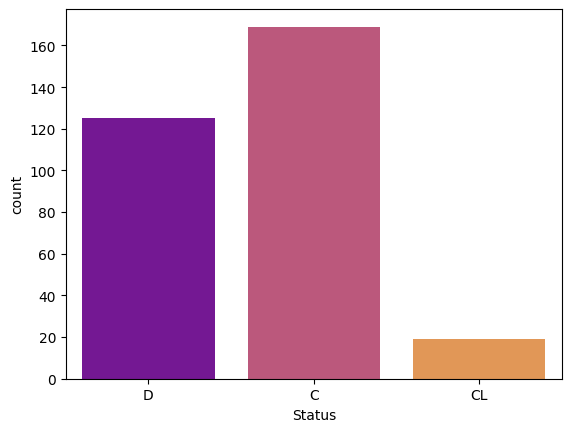

In [ ]:
sns.countplot(data=cirrhosis1,x="Status",palette="plasma")          #This will plot the count of Unique values in target column (Status)

Correlation Analysis

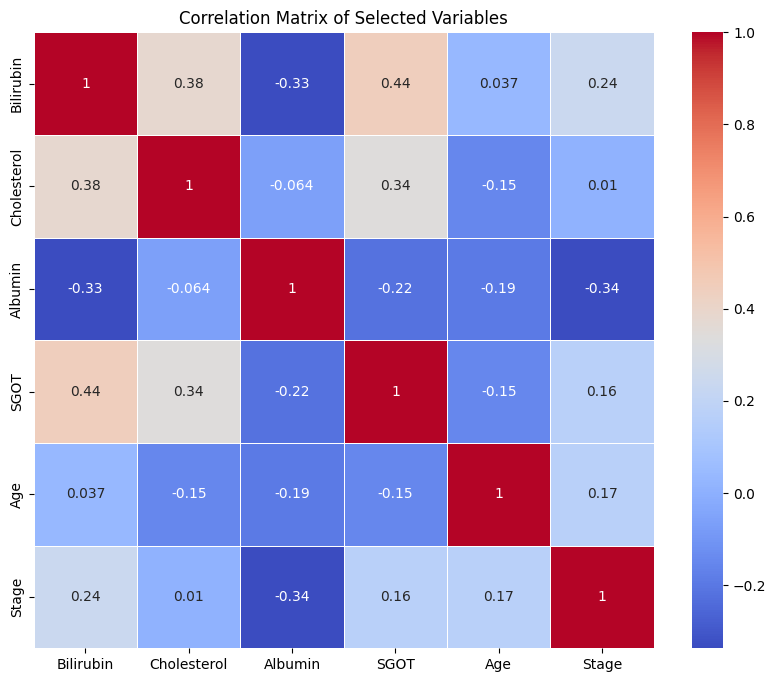

In [ ]:
# Correlation Analysis
correlation_matrix = cirrhosis1[['Bilirubin', 'Cholesterol', 'Albumin', 'SGOT', 'Age', 'Stage']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

By observing above plot we can conclude that:

*. Bilirubin and SGOT: These variables show the highest positive correlation (0.44), suggesting that as Bilirubin levels increase, SGOT levels also tend to increase.

*. Albumin and Bilirubin: The negative correlation (-0.33) suggests that as Albumin levels decrease, Bilirubin levels tend to increase.

*. Albumin and Stage: The negative correlation (-0.34) indicates that lower Albumin levels are associated with higher disease stages.

*. Age and Stage: The low positive correlation (0.17) might suggest a slight tendency for older patients to be in higher stages of the disease, but this is not strong.

In [ ]:
features=["Drug","Ascites","Hepatomegaly","Sex","Spiders","Edema" ]
for x in features:
  print(cirrhosis1[x].value_counts())           #This will give count of Unique values in features

Drug
D-penicillamine    159
Placebo            154
Name: count, dtype: int64
Ascites
N    289
Y     24
Name: count, dtype: int64
Hepatomegaly
Y    161
N    152
Name: count, dtype: int64
Sex
F    277
M     36
Name: count, dtype: int64
Spiders
N    223
Y     90
Name: count, dtype: int64
Edema
N    264
S     29
Y     20
Name: count, dtype: int64


Count Plots

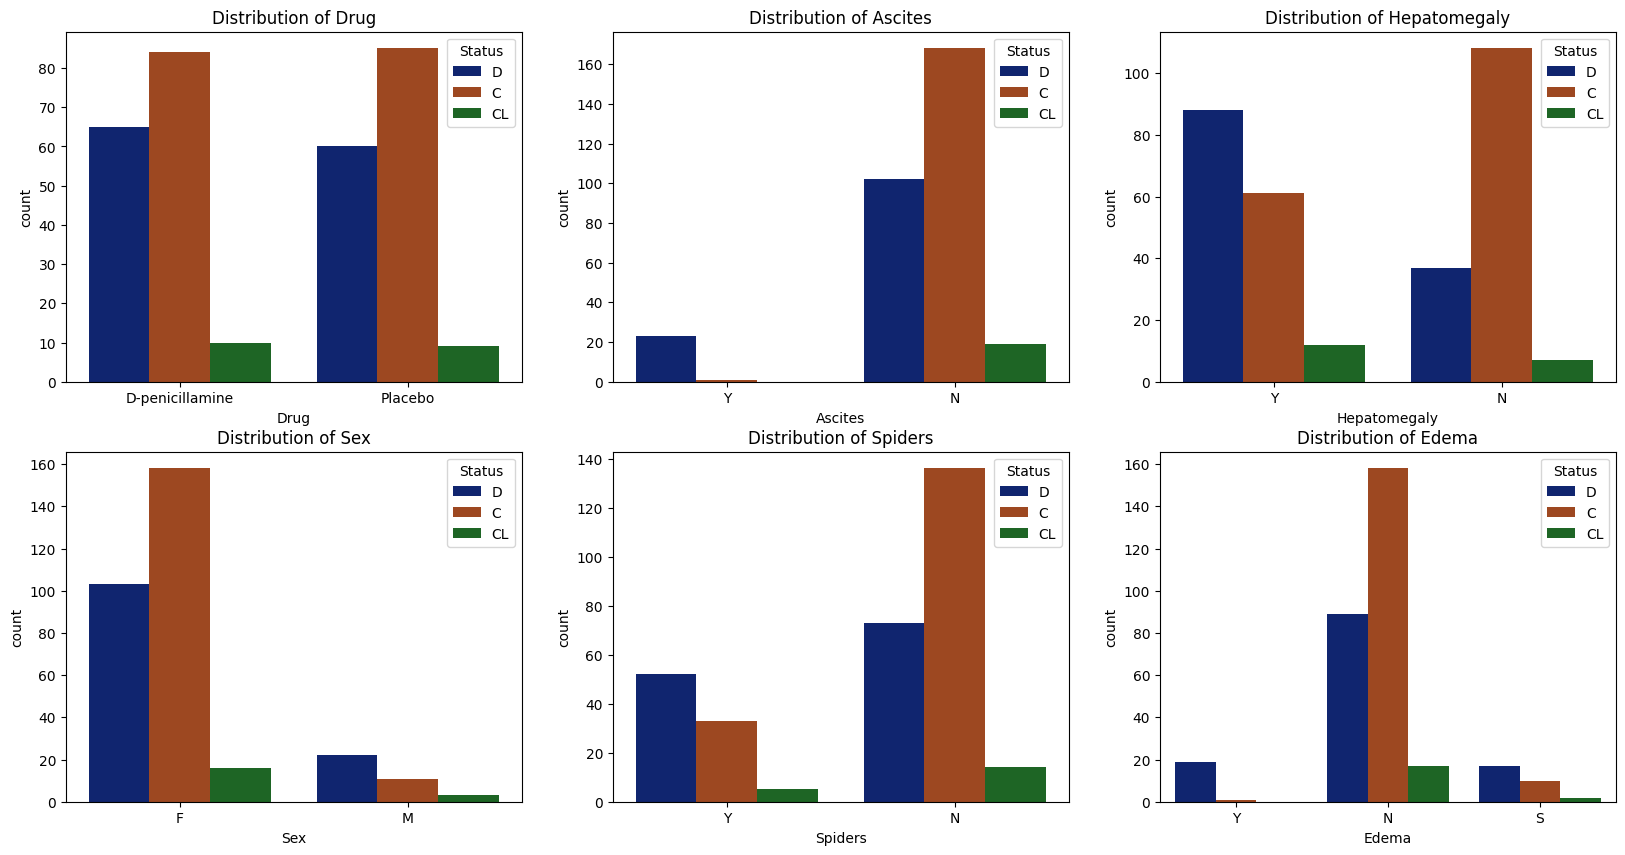

In [ ]:
 #This will plot the above count of unique values
#   It visualize different types of categorical variables in the DataFrame
#   1.   Firstly The categorical columns are defined to visualize.
#   2.   Then I create the figure with 2 rows and 3 columns of subplots.
#   3.   Then I add the title to plot.
#   4.   Then I plot the countplot by iterating over the features
fig=plt.figure(figsize=(20,10))
for i in enumerate(features):
  ax=fig.add_subplot(2,3,i[0]+1)
  sns.countplot(x=i[1],data=cirrhosis1,hue="Status",palette="dark")
  ax.set_title(f"Distribution of {i[1]}")

From above plots we can conclude that:

1. Censored Cases: The majority of the dataset is composed of censored cases (C) across all variables.

2. Dead Cases: The presence of conditions like ascites, hepatomegaly, spiders, and edema is associated with a higher proportion of dead cases (D).

3. Sex Distribution: There are more censored and dead cases among females compared to males.

4. Drug Impact: The distribution of dead and censored cases is similar between the D-penicillamine and placebo groups, indicating no clear difference in survival status based on the drug.

Pie Chart

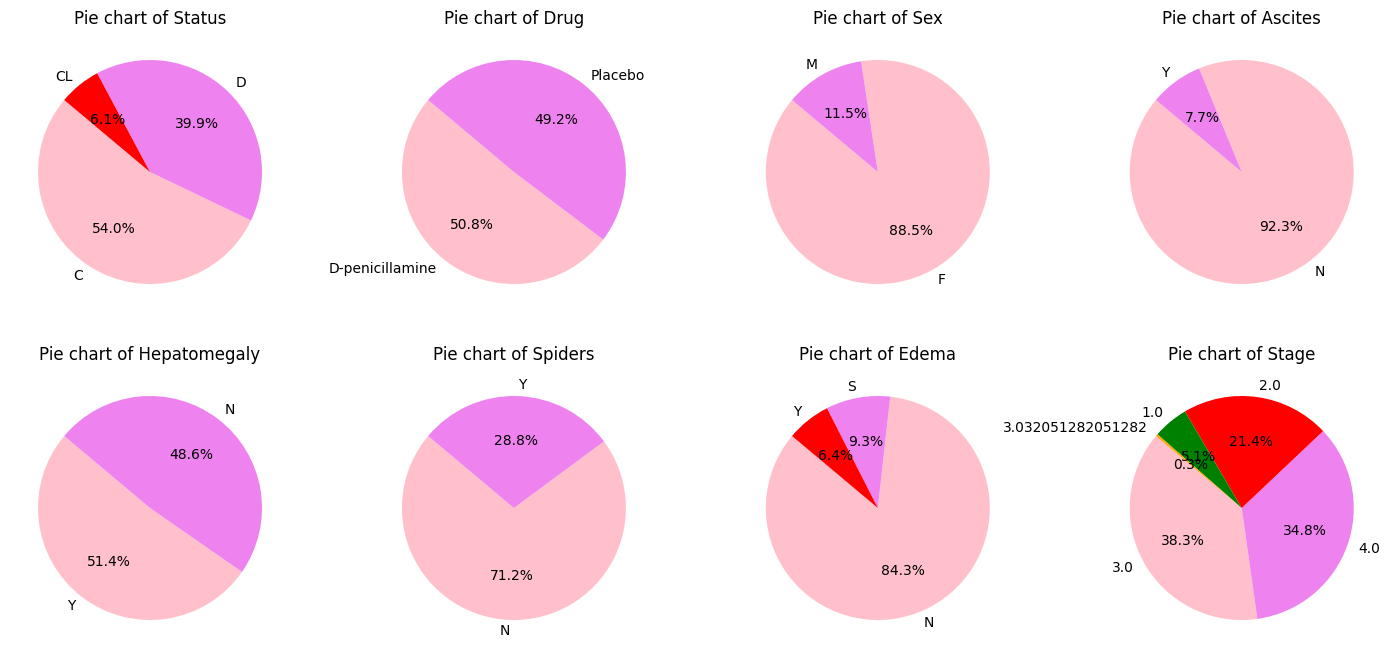

In [ ]:
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',"Stage"]
colors=["pink","violet","red","green","orange","blue","yellow"]
# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# # Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    # Pie chart
    if len(cirrhosis1[column].unique()) <= 5:
        axs[i].pie(cirrhosis1[column].value_counts(), labels=cirrhosis1[column].value_counts().index,colors=colors, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'Pie chart of {column}')



From above pie charts:

>. Status Distribution: A significant portion of the dataset consists of censored cases, followed by dead cases.

>. Drug Distribution: The dataset is evenly split between patients receiving D-penicillamine and Placebo.

>. Sex Distribution: There is a strong female predominance in the dataset.

>. Ascites, Hepatomegaly, and Spiders: The majority of patients do not have ascites or spiders, while the presence of hepatomegaly is nearly balanced.

>. Edema: Most patients do not have edema, and among those who do, slight edema is more common than significant edema.

>. Stage Distribution: The dataset is heavily weighted towards stages 3 and 4, with fewer patients in the early stages of the disease.

Histograms

Text(0.5, 0.98, 'Histograms of Numerical Variables')

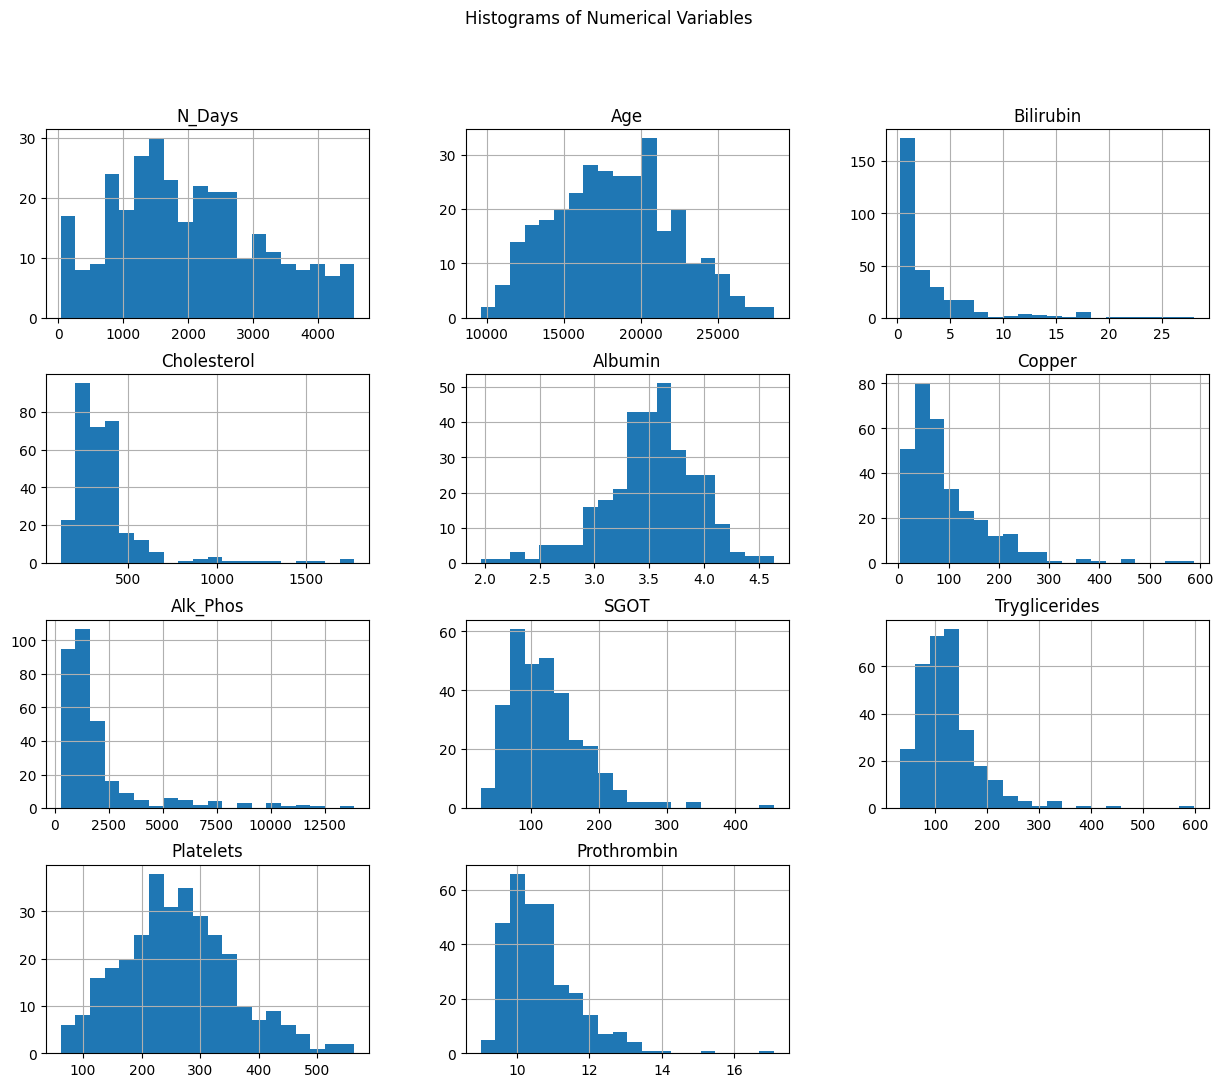

In [ ]:
# List of numerical columns to plot
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Plot histograms for numerical variables
cirrhosis1[numerical_cols].hist(figsize=(15, 12), bins=20, layout=(4, 3))
plt.suptitle('Histograms of Numerical Variables')

From above plots we can conclude that:

* Many of the variables (Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Triglycerides) are highly right-skewed, indicating that most observations are clustered around lower values with a few high-value outliers.

* Age and Albumin are the exceptions, with Age being roughly symmetrical and Albumin following an approximate normal distribution.


In [ ]:
numerical_cols =cirrhosis1 .select_dtypes(include=[np.number]).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cirrhosis1[numerical_cols].quantile(0.25)
Q3 = cirrhosis1[numerical_cols].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((cirrhosis1[numerical_cols] < lower_bound) |
            (cirrhosis1[numerical_cols] > upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Print the number of outliers for each feature
print("\nNumber of outliers in each feature:")
print(outlier_counts)

# Count the total number of rows with at least one outlier
total_outliers = outliers.any(axis=1).sum()

# Print the total number of rows with at least one outlier
print(f"\nTotal number of rows with at least one outlier: {total_outliers}")


Number of outliers in each feature:
ID                0
N_Days            0
Status            0
Drug              0
Age               1
Sex              36
Ascites          24
Hepatomegaly      0
Spiders           0
Edema            49
Bilirubin        31
Cholesterol      23
Albumin          11
Copper           17
Alk_Phos         35
SGOT              7
Tryglicerides    13
Platelets         4
Prothrombin      14
Stage             0
dtype: int64

Total number of rows with at least one outlier: 138


Box Plot

<Axes: >

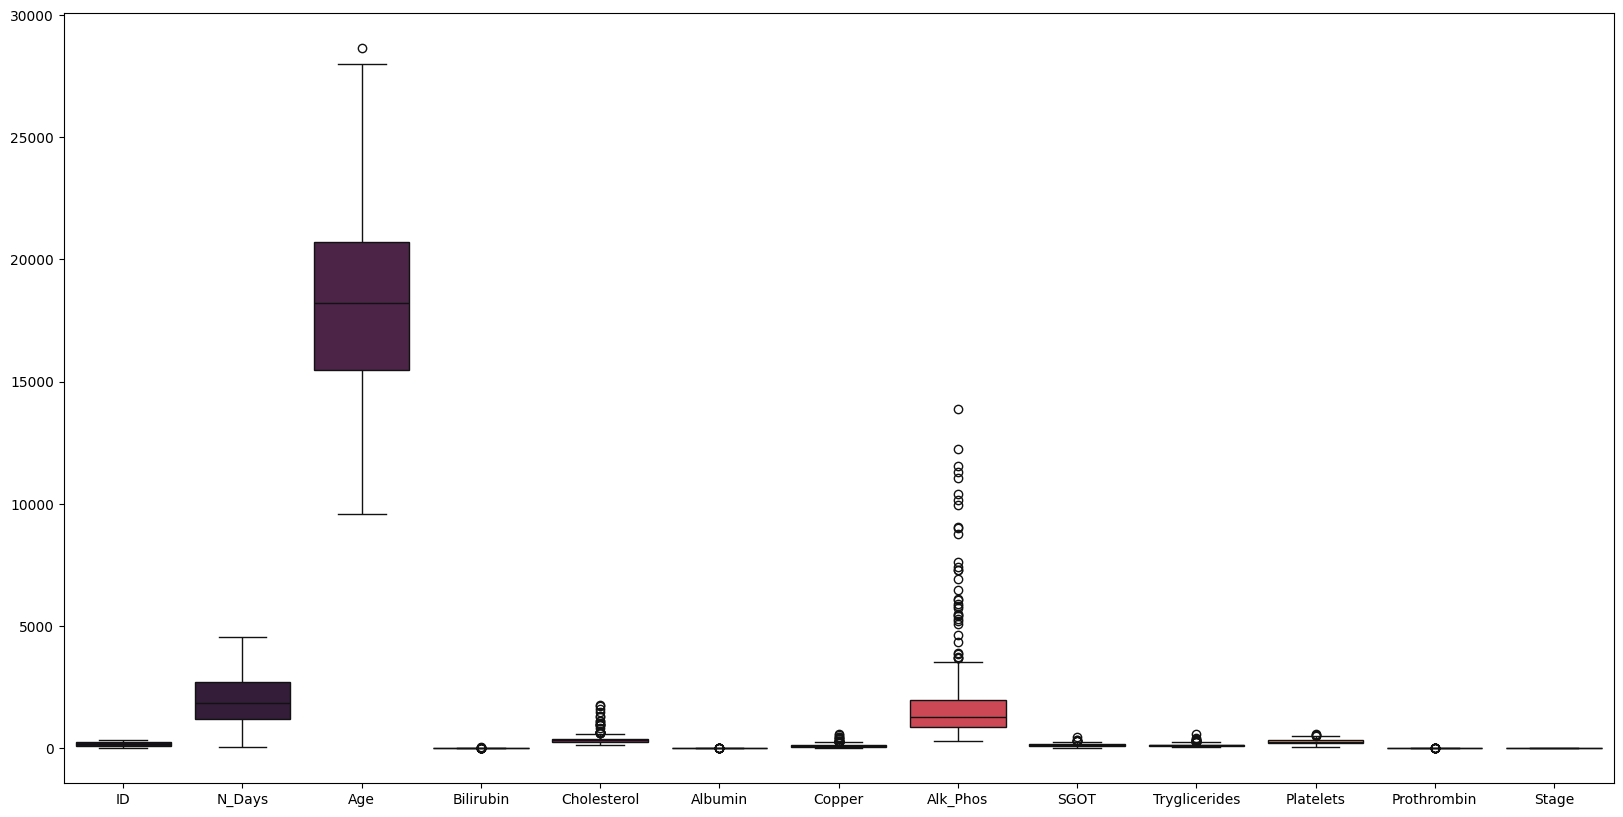

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data=cirrhosis1,palette="rocket")      #visualization of outliers in dataset

 This skewness in many of the variables suggests the presence of outliers and may indicate that transformations (such as logarithmic transformations) could be useful in further analysis to normalize these distributions.

In [ ]:
Q1 = cirrhosis1[numerical_cols].quantile(0.25)
Q3 = cirrhosis1[numerical_cols].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cirrhosis1 = cirrhosis1[~((cirrhosis1[numerical_cols] < lower_bound) |
                                     (cirrhosis1[numerical_cols] > upper_bound)).any(axis=1)]
# cirrhosis1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((cirrhosis1[numerical_cols] < lower_bound) |
            (cirrhosis1[numerical_cols] > upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Print the number of outliers for each feature
print("\nNumber of outliers in each feature:")
print(outlier_counts)

# Count the total number of rows with at least one outlier
total_outliers = outliers.any(axis=1).sum()

# Print the total number of rows with at least one outlier
print(f"\nTotal number of rows with at least one outlier: {total_outliers}")


Number of outliers in each feature:
ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

Total number of rows with at least one outlier: 0


Subplots

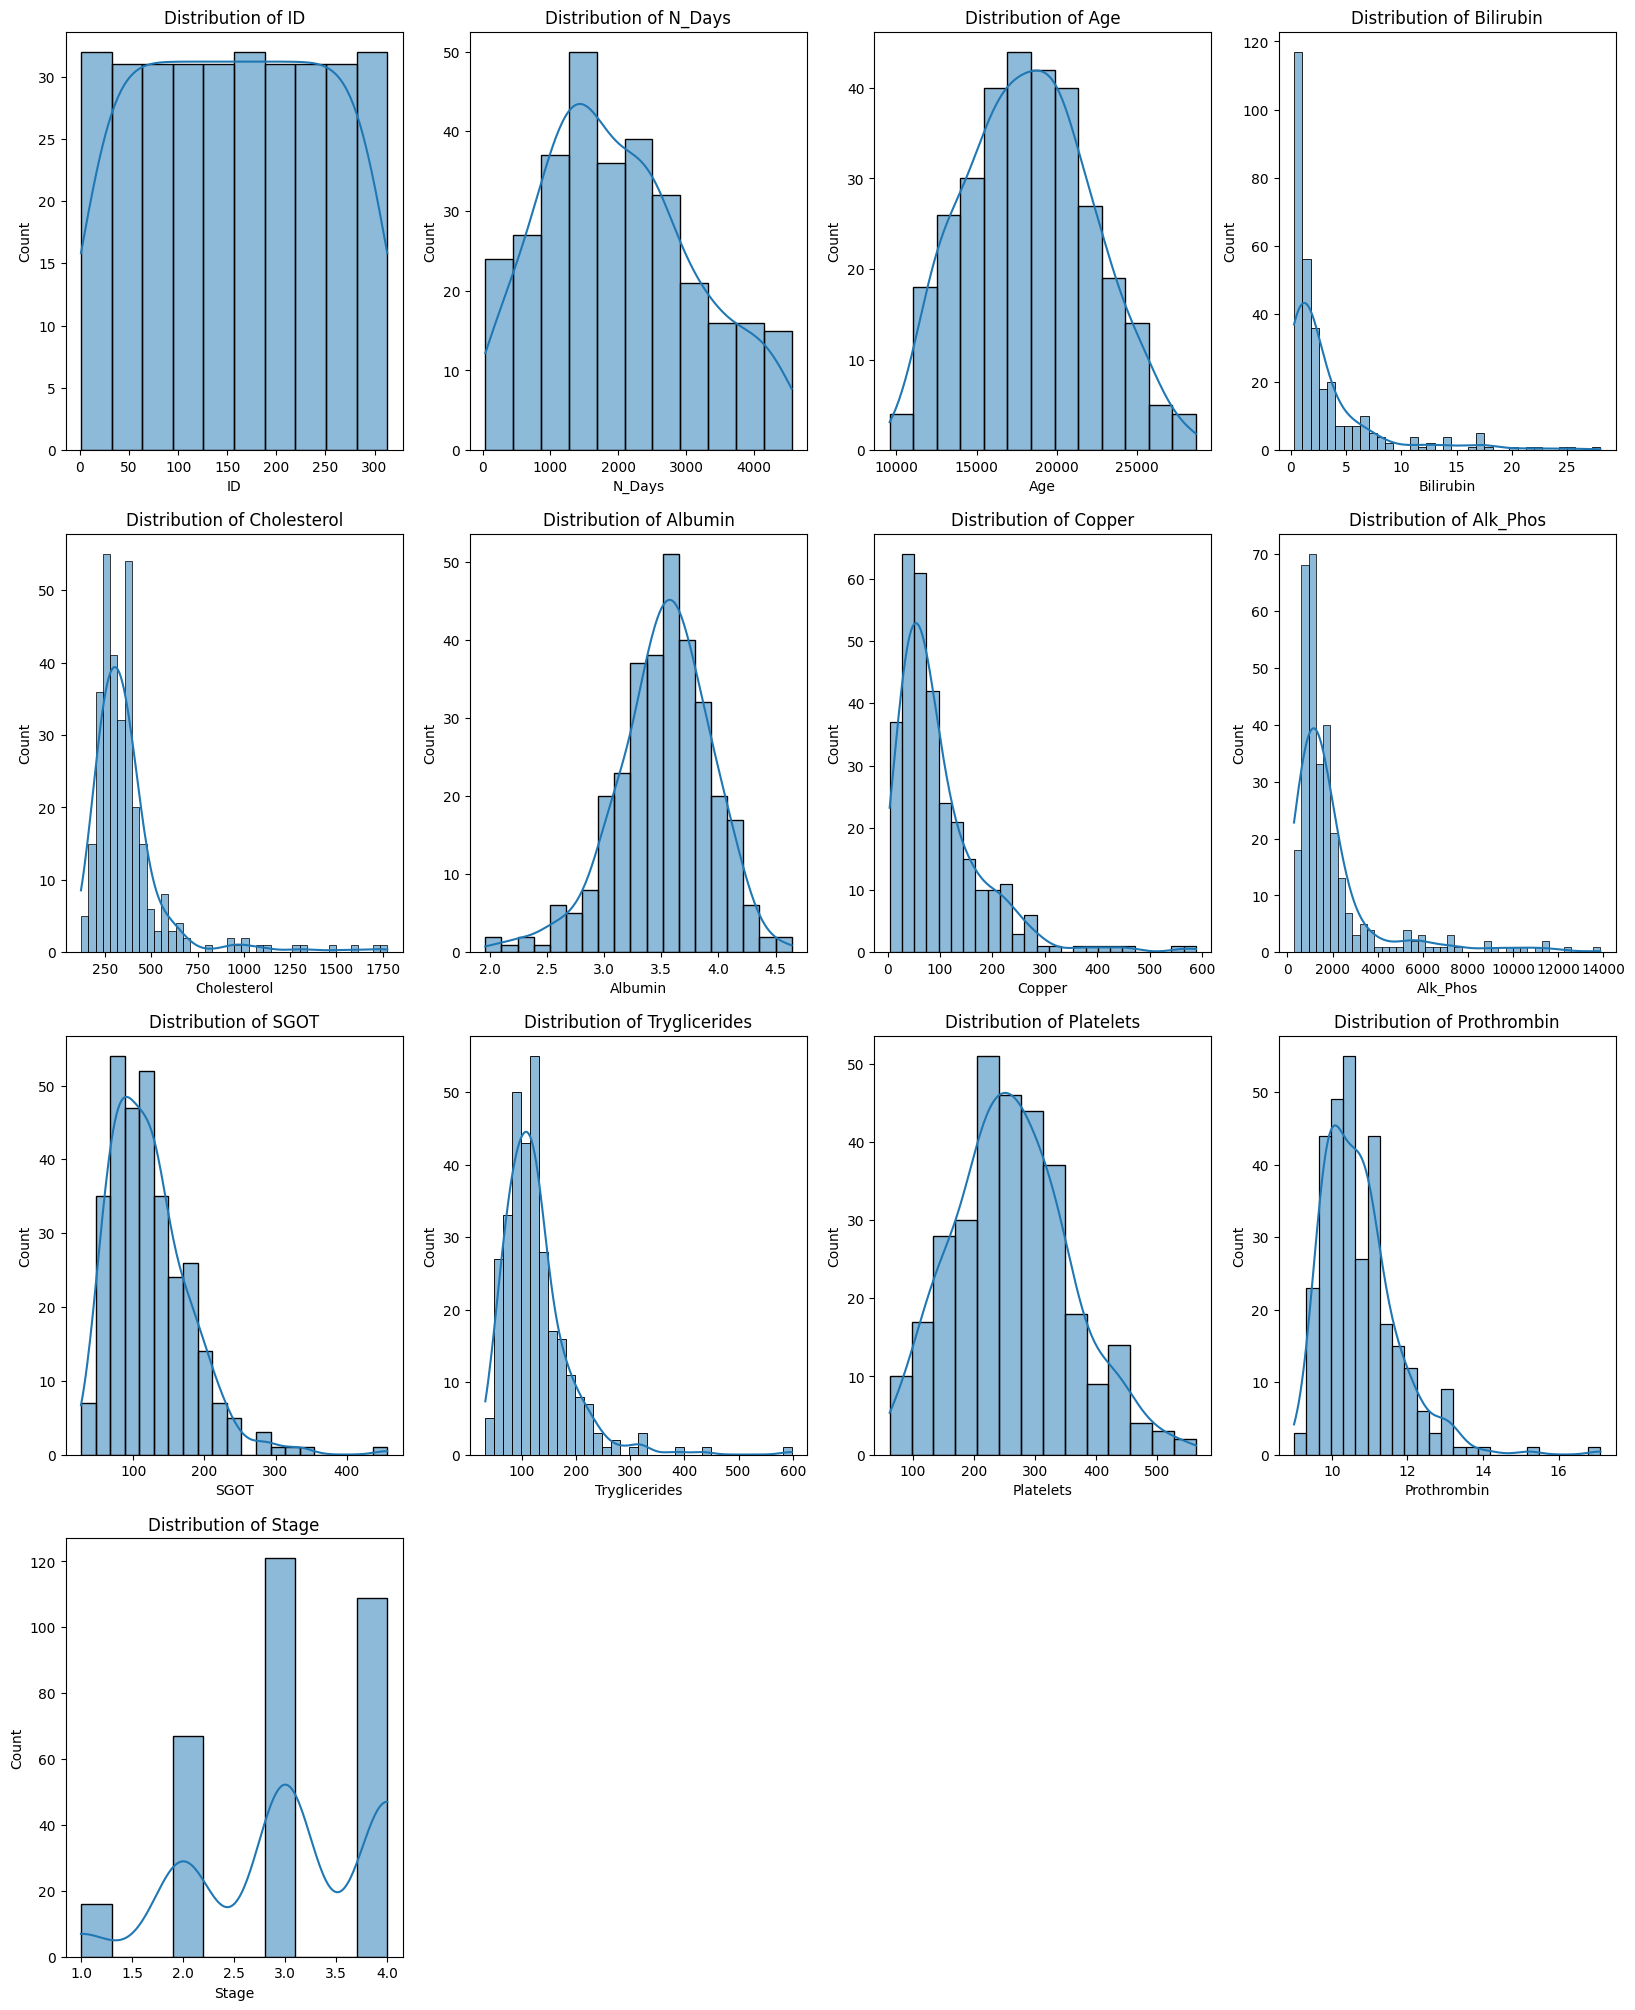

In [ ]:
# Visualize distributions for numerical columns
plt.figure(figsize=(20, 25))
columns=cirrhosis1.select_dtypes(include=['float64', 'int64']).columns
for i,column in enumerate(columns):
    plt.subplot(4,4,i+1)
    sns.histplot(cirrhosis1[column], kde=True)
    plt.title(f'Distribution of {column}')

From above plots we can conclude that:

* The majority of variables show a right-skewed distribution, indicating that most observations are concentrated at lower values with few high outliers.

* The Stage variable shows a multimodal distribution, suggesting that it is categorical with specific stages being more common.

* The Platelets and Prothrombin variables are also right-skewed, but with a clearer concentration of values around typical ranges for biological measures.

**Overall Conclusion**

* The right-skewed distributions of Bilirubin, Cholesterol, Copper, and others suggest that while most patients have lower values, there are notable cases with much higher values, highlighting severe conditions.

* The variable "Status" is critical for understanding patient outcomes and is likely influenced by multiple health metrics. High Bilirubin, low Albumin, and other abnormal values are expected to correlate with worse outcomes, such as death or liver transplant.

* By exploring the relationships between health metrics and patient outcomes, the dataset can provide valuable insights into the prognosis of liver disease, the effectiveness of treatments, and the identification of high-risk patients. These insights can ultimately inform better clinical decision-making and personalized treatment strategies.

# **4.Modelling**

In [ ]:
cirrhosis1.info()          #This will give Index, Data types and memory information after label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             313 non-null    int64  
 1   N_Days         313 non-null    int64  
 2   Status         313 non-null    object 
 3   Drug           313 non-null    object 
 4   Age            313 non-null    int64  
 5   Sex            313 non-null    object 
 6   Ascites        313 non-null    object 
 7   Hepatomegaly   313 non-null    object 
 8   Spiders        313 non-null    object 
 9   Edema          313 non-null    object 
 10  Bilirubin      313 non-null    float64
 11  Cholesterol    313 non-null    float64
 12  Albumin        313 non-null    float64
 13  Copper         313 non-null    float64
 14  Alk_Phos       313 non-null    float64
 15  SGOT           313 non-null    float64
 16  Tryglicerides  313 non-null    float64
 17  Platelets      313 non-null    float64
 18  Prothrombi

In [ ]:

le=LabelEncoder()
columns=["Status","Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]
cirrhosis1[columns] = cirrhosis1[columns].apply(le.fit_transform)

In [ ]:
cirrhosis1.info()          #This will give Index, Data types and memory information after label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             313 non-null    int64  
 1   N_Days         313 non-null    int64  
 2   Status         313 non-null    int64  
 3   Drug           313 non-null    int64  
 4   Age            313 non-null    int64  
 5   Sex            313 non-null    int64  
 6   Ascites        313 non-null    int64  
 7   Hepatomegaly   313 non-null    int64  
 8   Spiders        313 non-null    int64  
 9   Edema          313 non-null    int64  
 10  Bilirubin      313 non-null    float64
 11  Cholesterol    313 non-null    float64
 12  Albumin        313 non-null    float64
 13  Copper         313 non-null    float64
 14  Alk_Phos       313 non-null    float64
 15  SGOT           313 non-null    float64
 16  Tryglicerides  313 non-null    float64
 17  Platelets      313 non-null    float64
 18  Prothrombi

# **4.1 Logistic Regression**

### Feature selection

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)          #Dropping the target column
y=cirrhosis1[["Status"]]                       #Target column

## Data splitting & training

In [ ]:
x_trainL,x_testL,y_trainL,y_testL=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic regression without standerdizing

In [ ]:
# without standardizing
classifier=LogisticRegression(random_state=36,n_jobs=-1)         #Logistic Regression
classifier.fit(x_trainL,y_trainL)
y_predL=classifier.predict(x_testL)                            #Prediction
# print(y_predL)
print("actual values:",y_testL.shape)                          #Actual values
print("\n")
accuracy_score(y_testL,y_predL)*100
y_train_pred=classifier.predict(x_trainL)
print('Train accuracy',accuracy_score(y_trainL,y_train_pred)*100)
y_test_pred=classifier.predict(x_testL)
print('Test accuracy',accuracy_score(y_testL,y_test_pred)*100)

actual values: (63, 1)


Train accuracy 88.4
Test accuracy 77.77777777777779


## Standerdize the features

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainL,x_testL,y_trainL,y_testL=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_trainL=sc.fit_transform(x_trainL)
x_testL=sc.transform(x_testL)

## Model fitting

In [ ]:
classifier=LogisticRegression(random_state=36,n_jobs=-1)         #Logistic Regression
classifier.fit(x_trainL,y_trainL)                               #Model fitting

LogisticRegression(n_jobs=-1, random_state=36)

In [ ]:
y_predL=classifier.predict(x_testL)                            #Prediction
print(y_predL)
print("actual values:",y_testL.shape)                          #Actual values
print("\n")
accuracy_score(y_testL,y_predL)*100                             #Accuracy score

[2 2 0 0 0 2 0 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0
 0 2 0 0 2 0 0 0 0 0 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 1]
actual values: (63, 1)




77.77777777777779

By fitting logistic regression we get 77.77 % as accuracy score

### Applying boosting techniques

AdaBoostClassifier

In [ ]:
classifier = AdaBoostClassifier(n_estimators=12,random_state=40)          #Adaa Boosting
classifier.fit(x_trainL, y_trainL)
y_predL=classifier.predict(x_testL)                                       #Prediction
# print(y_predL)

accuracy_score(y_testL,y_predL)*100                                       #Accuracy score

73.01587301587301

GradientBoostingClassifier

In [ ]:
classifier=GradientBoostingClassifier(n_estimators=12,random_state=40)     #Gradient Boosting
classifier.fit(x_trainL,y_trainL)

y_predL=classifier.predict(x_testL)
# print(y_predL)
accuracy_score(y_testL,y_predL)*100

77.77777777777779

XGBClassifier

In [ ]:
classifier=XGBClassifier(random_state=40,n_jobs=-1)          #XGBoosting
classifier.fit(x_trainL,y_trainL)
y_predL=classifier.predict(x_testL)                          #Prediction
# print(y_predL)
accuracy_score(y_testL,y_predL)*100                           #Accuracy score

79.36507936507937

From above 3 boosting techniques we conclude that:

* By applying Ada boosting algorithm we got accuracy score as 73.01 %
* By applying Gradient boosting algoritm we got accuracy score as 77.77 %
* By applying XG boosting algoritm we got accuracy score as 79.36 %


## **4.2 Decision Tree Classifier**

DecisionTree Classifier **without standerdizing** bold textby using criterion as **entropy**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainDTC,x_testDTC,y_trainDTC,y_testDTC=train_test_split(x,y,test_size=0.2,random_state=42)         #Data splitting

classifier=DecisionTreeClassifier(criterion="entropy",random_state=80,max_depth=4,min_samples_leaf=1)
classifier.fit(x_trainDTC,y_trainDTC)                               #Decision Tree Classifier

y_predDTC=classifier.predict(x_testDTC)                            #Prediction
# print(y_predDTC)
print("actual values:",y_testDTC.shape)                          #Actual values
print("\n")
accuracy_score(y_testDTC,y_predDTC)*100

actual values: (63, 1)




74.60317460317461

DecisionTree Classifier **with standerdizing** by using criterion as **entropy**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)          #Dropping the target column
y=cirrhosis1[["Status"]]

sc=StandardScaler()
x_trainDTC=sc.fit_transform(x_trainDTC)
x_testDTC=sc.transform(x_testDTC)

classifier=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=4,min_samples_leaf=1)   #Decision Tree Classifier
classifier.fit(x_trainDTC,y_trainDTC)


y_predDTC=classifier.predict(x_testDTC)                             #Prediction
# print(y_predDTC)
print("actual values:",y_testDTC.shape)                             #Actual values
print("\n")
accuracy_score(y_testDTC,y_predDTC)*100
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

actual values: (63, 1)


Train accuracy 90.8
Test accuracy 74.60317460317461


Applying Boosting technique

AdaBoostClassifier

In [ ]:
classifier = AdaBoostClassifier(n_estimators=12,random_state=40)          #Adaa Boosting
classifier.fit(x_trainDTC, y_trainDTC)
y_predDTC=classifier.predict(x_testDTC)                                       #Prediction
# print(y_predDTC)

accuracy_score(y_testDTC,y_predDTC)*100                                       #Accuracy score
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

Train accuracy 84.8
Test accuracy 73.01587301587301


GradientBoostingClassifier

In [ ]:
classifier=GradientBoostingClassifier(n_estimators=12,random_state=40)     #Gradient Boosting
classifier.fit(x_trainDTC,y_trainDTC)

y_predDTC=classifier.predict(x_testDTC)
# print(y_predDTC)
accuracy_score(y_testDTC,y_predDTC)*100
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

Train accuracy 92.4
Test accuracy 77.77777777777779


XGBClassifier

In [ ]:
classifier=XGBClassifier(random_state=40,n_jobs=-1)          #XGBoosting
classifier.fit(x_trainDTC,y_trainDTC)
y_predDTC=classifier.predict(x_testDTC)                          #Prediction
# print(y_predDTC)
accuracy_score(y_testDTC,y_predDTC)*100                           #Accuracy score
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 79.36507936507937


DecisionTree Classifier **without standerdizing** by using criterion as **gini**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainDTC,x_testDTC,y_trainDTC,y_testDTC=train_test_split(x,y,test_size=0.2,random_state=102)         #Data splitting

classifier=DecisionTreeClassifier(criterion="gini",random_state=102,max_depth=4,min_samples_leaf=1)
classifier.fit(x_trainDTC,y_trainDTC)                               #Decision Tree Classifier

y_predDTC=classifier.predict(x_testDTC)                            #Prediction
# print(y_predDTC)
print("actual values:",y_testDTC.shape)                          #Actual values
print("\n")
accuracy_score(y_testDTC,y_predDTC)*100
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

actual values: (35, 1)


Train accuracy 90.0
Test accuracy 85.71428571428571


DecisionTree Classifier **with standerdizing** by using criterion as **gini**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)          #Dropping the target column
y=cirrhosis1[["Status"]]

sc=StandardScaler()
x_trainDTC=sc.fit_transform(x_trainDTC)
x_testDTC=sc.transform(x_testDTC)

classifier=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=4,min_samples_leaf=1)   #Decision Tree Classifier
classifier.fit(x_trainDTC,y_trainDTC)


y_predDTC=classifier.predict(x_testDTC)                             #Prediction
# print(y_predDTC)
print("actual values:",y_testDTC.shape)                             #Actual values
print("\n")
accuracy_score(y_testDTC,y_predDTC)*100
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)


actual values: (35, 1)


Train accuracy 90.0
Test accuracy 80.0


Applying boosting technique

AdaBoostClassifier

In [ ]:
classifier = AdaBoostClassifier(n_estimators=12,random_state=40)          #Adaa Boosting
classifier.fit(x_trainDTC, y_trainDTC)
y_predDTC=classifier.predict(x_testDTC)                                       #Prediction
# print(y_predDTC)

accuracy_score(y_testDTC,y_predDTC)*100                                       #Accuracy score
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

Train accuracy 85.71428571428571
Test accuracy 77.14285714285715


GradientBoostingClassifier

In [ ]:
classifier=GradientBoostingClassifier(n_estimators=12,random_state=40)     #Gradient Boosting
classifier.fit(x_trainDTC,y_trainDTC)

y_predDTC=classifier.predict(x_testDTC)
# print(y_predDTC)
accuracy_score(y_testDTC,y_predDTC)*100
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

Train accuracy 94.28571428571428
Test accuracy 88.57142857142857


XGBClassifier

In [ ]:
classifier=XGBClassifier(random_state=40,n_jobs=-1)          #XGBoosting
classifier.fit(x_trainDTC,y_trainDTC)
y_predDTC=classifier.predict(x_testDTC)                          #Prediction
# print(y_predDTC)
accuracy_score(y_testDTC,y_predDTC)*100                           #Accuracy score
y_train_pred=classifier.predict(x_trainDTC)
print('Train accuracy',accuracy_score(y_trainDTC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testDTC)
print('Test accuracy',accuracy_score(y_testDTC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 85.71428571428571


From above all information of Decisiontree classifier, we conclude that:

* using criterion=entropy:

  Without & with standerdizing, the accuracy_score is 74.60%

  By applying Ada boosting algorithm we got accuracy score as 73.01 %

  By applying Gradient boosting algoritm we got accuracy score as 77.77 %

  By applying XG boosting algoritm we got accuracy score as 79.36 %

* using criterion=gini:

  Without  standerdizing, the accuracy_score is 85.71%
  With  standerdizing, the accuracy_score is80%

  By applying Ada boosting algorithm we got accuracy score as 77.14 %

  By applying Gradient boosting algoritm we got accuracy score as 88.75 %

  By applying XG boosting algoritm we got accuracy score as 85.71 %

# **4.3 RandomForest Classifier**

Random Forest Classifier **without standerdizing** by criterion as **entropy**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainRF,x_testRF,y_trainRF,y_testRF=train_test_split(x,y,test_size=0.2,random_state=42)         #Data splitting

classifier=RandomForestClassifier(criterion="entropy",random_state=110,max_depth=4,min_samples_leaf=1)
classifier.fit(x_trainRF,y_trainRF)                               #Decision Tree Classifier

y_predRF=classifier.predict(x_testRF)                            #Prediction
# print(y_predRF)
print("actual values:",x_testRF.shape,y_testRF.shape)                          #Actual values
print("\n")
accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

actual values: (43, 19) (43, 1)


Train accuracy 90.53254437869822
Test accuracy 79.06976744186046


Random Forest Classifier **with standerdizing** by criterion as **entropy**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainRF,x_testRF,y_trainRF,y_testRF=train_test_split(x,y,test_size=0.2,random_state=101)         #Data splitting

sc=StandardScaler()
x_trainRF=sc.fit_transform(x_trainRF)
x_testRF=sc.transform(x_testRF)


classifier=RandomForestClassifier(criterion="entropy",random_state=80,max_depth=4,min_samples_leaf=1)
classifier.fit(x_trainRF,y_trainRF)                               #Decision Tree Classifier


y_predRF=classifier.predict(x_testRF)                            #Prediction
# print(y_predRF)
print("actual values:",x_testRF.shape,y_testRF.shape)                          #Actual values
print("\n")
accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

actual values: (43, 19) (43, 1)


Train accuracy 90.53254437869822
Test accuracy 74.4186046511628


GridSearchCV

In [ ]:
param_grid = {

    # 'kernel': ['rbf']
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_trainRF, y_trainRF)

# Get the best parameters and best model from GridSearchCV
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Make predictions on the test set using the best model from GridSearchCV
y_predRF = best_model_grid.predict(x_testRF)

# Evaluate the GridSearchCV model
accuracy_grid = accuracy_score(y_testRF, y_predRF)
report_grid = classification_report(y_testRF, y_predRF)
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

print('GridSearchCV Results:')
print(f'Best Parameters: {best_params_grid}')
print(f'Accuracy: {accuracy_grid * 100:.2f}%')
print(f'Classification Report:\n{report_grid}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Train accuracy 89.28571428571429
Test accuracy 68.57142857142857
GridSearchCV Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 74.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        21
           1       0.00      0.00      0.00         3
           2       1.00      0.45      0.62        11

    accuracy                           0.74        35
   macro avg       0.57      0.48      0.48        35
weighted avg       0.73      0.74      0.69        35

Train accuracy 89.28571428571429
Test accuracy 68.57142857142857


Applying boosting techniques

AdaBoostClassifier

In [ ]:
classifier = AdaBoostClassifier(n_estimators=12,random_state=40)          #Adaa Boosting
classifier.fit(x_trainRF, y_trainRF)
y_predRF=classifier.predict(x_testRF)                                       #Prediction
# print(y_predRF)

accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)                                     #Accuracy score

Train accuracy 78.57142857142857
Test accuracy 60.0


GradientBoostingClassifier

In [ ]:
classifier=GradientBoostingClassifier(n_estimators=12,random_state=40)     #Gradient Boosting
classifier.fit(x_trainRF,y_trainRF)

y_predRF=classifier.predict(x_testRF)
# print(y_predRF)
accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

Train accuracy 92.14285714285714
Test accuracy 71.42857142857143


XGBClassifier

In [ ]:
classifier=XGBClassifier(random_state=40,n_jobs=-1)          #XGBoosting
classifier.fit(x_trainRF,y_trainRF)
y_predRF=classifier.predict(x_testRF)                          #Prediction
# print(y_predRF)
accuracy_score(y_testRF,y_predRF)*100                           #Accuracy score
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 71.42857142857143


Random Forest Classifier **without standerdizing** by criterion as **gini**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainRF,x_testRF,y_trainRF,y_testRF=train_test_split(x,y,test_size=0.2,random_state=102)         #Data splitting

classifier=RandomForestClassifier(criterion="gini",random_state=80,max_depth=4,min_samples_leaf=1)
classifier.fit(x_trainRF,y_trainRF)                               #Decision Tree Classifier

y_predRF=classifier.predict(x_testRF)                            #Prediction
# print(y_predRF)
print("actual values:",x_testRF.shape,y_testRF.shape)                          #Actual values
print("\n")
accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

actual values: (35, 19) (35, 1)


Train accuracy 90.71428571428571
Test accuracy 88.57142857142857


Random Forest Classifier **with standerdizing by** criterion as **gini**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]
x_trainRF,x_testRF,y_trainRF,y_testRF=train_test_split(x,y,test_size=0.2,random_state=102)         #Data splitting

sc=StandardScaler()
x_trainRF=sc.fit_transform(x_trainRF)
x_testRF=sc.transform(x_testRF)


classifier=RandomForestClassifier(criterion="gini",random_state=80,max_depth=4,min_samples_leaf=1)
classifier.fit(x_trainRF,y_trainRF)                               #Decision Tree Classifier


y_predRF=classifier.predict(x_testRF)                            #Prediction
# print(y_predRF)
print("actual values:",x_testRF.shape,y_testRF.shape)                          #Actual values
print("\n")
accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

actual values: (35, 19) (35, 1)


Train accuracy 90.71428571428571
Test accuracy 85.71428571428571


Applying boosting techniques

AdaBoostClassifier

In [ ]:
classifier = AdaBoostClassifier(n_estimators=12,random_state=200)          #Adaa Boosting
classifier.fit(x_trainRF, y_trainRF)
y_predRF=classifier.predict(x_testRF)                                       #Prediction
# print(y_predRF)

accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

Train accuracy 85.71428571428571
Test accuracy 77.14285714285715


GradientBoostingClassifier

In [ ]:
classifier=GradientBoostingClassifier(n_estimators=15,random_state=120)     #Gradient Boosting
classifier.fit(x_trainRF,y_trainRF)

y_predRF=classifier.predict(x_testRF)
# print(y_predRF)
accuracy_score(y_testRF,y_predRF)*100
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

Train accuracy 95.0
Test accuracy 88.57142857142857


XGBClassifier

In [ ]:
classifier=XGBClassifier(random_state=101,n_jobs=-1)          #XGBoosting
classifier.fit(x_trainRF,y_trainRF)
y_predRF=classifier.predict(x_testRF)                          #Prediction
# print(y_predRF)
accuracy_score(y_testRF,y_predRF)*100                           #Accuracy score
y_train_pred=classifier.predict(x_trainRF)
print('Train accuracy',accuracy_score(y_trainRF,y_train_pred)*100)
y_test_pred=classifier.predict(x_testRF)
print('Test accuracy',accuracy_score(y_testRF,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 85.71428571428571


From above all information of RandomForest classifier, we conclude that:

using criterion=entropy:

Without standerdizing, the accuracy_score is 79.07%

With standerdizing, the accuracy_score is 74.41%

By applying Ada boosting algorithm we got accuracy score as 60.0 %

By applying Gradient boosting algoritm we got accuracy score as 71.42 %

By applying XG boosting algoritm we got accuracy score as 71.42 %

using criterion=gini:

Without standerdizing, the accuracy_score is 88.57%

With standerdizing, the accuracy_score is 85.71%

By applying Ada boosting algorithm we got accuracy score as 77.14 %

By applying Gradient boosting algoritm we got accuracy score as 88.57 %

By applying XG boosting algoritm we got accuracy score as 85.71 %

# **4.4 Support Vector Machine**

Supprt Vector Machine **without Standerzing**

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]

x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=42)


classifier=SVC(kernel="rbf",random_state=101,C=200)

classifier.fit(x_trainSVC,y_trainSVC)
y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)



Train accuracy 77.8688524590164
Test accuracy 69.81132075471697


Support Vector machine **with Standerizing**

In [ ]:

x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]

x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=101)


classifier=SVC(kernel="rbf",random_state=101,C=120)
classifier.fit(x_trainSVC,y_trainSVC)


from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier from sklearn.ensemble
classifier=GradientBoostingClassifier(random_state=40)
classifier.fit(x_trainSVC,y_trainSVC)

y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 79.24528301886792


#Applying Boosting algorithms

AdaBoostClassifier

In [ ]:
x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]

x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=101)


classifier=SVC(kernel="rbf",random_state=40,C=100)
classifier.fit(x_trainSVC,y_trainSVC)

classifier = AdaBoostClassifier(random_state=101)
classifier.fit(x_trainSVC, y_trainSVC)
y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 88.52459016393442
Test accuracy 77.35849056603774


XGBClassifier

In [ ]:

x=cirrhosis1.drop(["Status"],axis=1)
y=cirrhosis1[["Status"]]

x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=102)


classifier=SVC(kernel="rbf",random_state=102,C=105)
classifier=XGBClassifier(random_state=40,n_jobs=-1)
classifier.fit(x_trainSVC,y_trainSVC)
y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 84.90566037735849


Support Vector machine **with Standerzing**

In [ ]:
x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=102)

sc=StandardScaler()
x_trainSVC=sc.fit_transform(x_trainSVC)
x_testSVC=sc.transform(x_testSVC)

classifier=SVC(kernel="rbf",random_state=101,C=110)
classifier.fit(x_trainSVC,y_trainSVC)



y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 88.67924528301887


# Applying Boosting Algorithms

GradientBoostingClassifier

In [ ]:
x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=102)

sc=StandardScaler()
x_trainSVC=sc.fit_transform(x_trainSVC)
x_testSVC=sc.transform(x_testSVC)

classifier=SVC(kernel="rbf",random_state=103,C=100)
classifier.fit(x_trainSVC,y_trainSVC)

from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier from sklearn.ensemble
classifier=GradientBoostingClassifier(random_state=40)
classifier.fit(x_trainSVC,y_trainSVC)

y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 84.90566037735849


AdaBoostClassifier

In [ ]:
x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=42)

sc=StandardScaler()
x_trainSVC=sc.fit_transform(x_trainSVC)
x_testSVC=sc.transform(x_testSVC)

classifier=SVC(kernel="rbf",random_state=40,C=100)
classifier.fit(x_trainSVC,y_trainSVC)
classifier = AdaBoostClassifier(random_state=40)
classifier.fit(x_trainSVC, y_trainSVC)


y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 85.24590163934425
Test accuracy 77.35849056603774


In [ ]:
x_trainSVC,x_testSVC,y_trainSVC,y_testSVC=train_test_split(x,y,test_size=0.3,random_state=42)

sc=StandardScaler()
x_trainSVC=sc.fit_transform(x_trainSVC)
x_testSVC=sc.transform(x_testSVC)

classifier=SVC(kernel="rbf",random_state=40,C=100)
classifier.fit(x_trainSVC,y_trainSVC)
classifier=XGBClassifier(random_state=40,n_jobs=-1)
classifier.fit(x_trainSVC,y_trainSVC)



y_predSVC=classifier.predict(x_testSVC)

accuracy_score(y_testSVC,y_predSVC)*100
y_train_pred=classifier.predict(x_trainSVC)
print('Train accuracy',accuracy_score(y_trainSVC,y_train_pred)*100)
y_test_pred=classifier.predict(x_testSVC)
print('Test accuracy',accuracy_score(y_testSVC,y_test_pred)*100)

Train accuracy 100.0
Test accuracy 79.24528301886792


RandomizedSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming cirrhosis1 is your dataset and 'Status' is the target variable
X = cirrhosis1.drop(columns=['Status'])
y = cirrhosis1['Status']

# Split the dataset into training and testing sets
X_trainSVC, X_testSVC, y_trainSVC, y_testSVC = train_test_split(X, y, test_size=0.3, random_state=103)

# Standardize the features
sc = StandardScaler()
X_trainSVC = sc.fit_transform(X_trainSVC)
X_testSVC = sc.transform(X_testSVC)

# Define the model
classifier = SVC(random_state=102)

# Define the parameter distribution
param_dist = {
    'kernel': ['rbf'],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, cv=3, random_state=102)
random_search.fit(X_trainSVC, y_trainSVC)

# Get the best parameters and best model from RandomizedSearchCV
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the training set using the best model from RandomizedSearchCV
y_train_pred = best_model_random.predict(X_trainSVC)

# Print training accuracy
train_accuracy = accuracy_score(y_trainSVC, y_train_pred)
print('Train accuracy:', train_accuracy * 100)

# Make predictions on the test set using the best model from RandomizedSearchCV
y_test_pred = best_model_random.predict(X_testSVC)

# Evaluate the RandomizedSearchCV model
test_accuracy = accuracy_score(y_testSVC, y_test_pred)
report_random = classification_report(y_testSVC, y_test_pred)

print('Test accuracy:', test_accuracy * 100)

print('\nRandomizedSearchCV Results:')
print(f'Best Parameters: {best_params_random}')
print(f'Accuracy: {test_accuracy * 100:.2f}%')
print(f'Classification Report:\n{report_random}')


Train accuracy: 90.98360655737704
Test accuracy: 84.90566037735849

RandomizedSearchCV Results:
Best Parameters: {'kernel': 'rbf'}
Accuracy: 84.91%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       0.00      0.00      0.00         4
           2       0.83      0.56      0.67         9

    accuracy                           0.85        53
   macro avg       0.56      0.52      0.53        53
weighted avg       0.78      0.85      0.81        53



GridSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming cirrhosis1 is your dataset and 'Status' is the target variable
X = cirrhosis1.drop(columns=['Status'])
y = cirrhosis1['Status']

# Split the dataset into training and testing sets
X_trainSVC, X_testSVC, y_trainSVC, y_testSVC = train_test_split(X, y, test_size=0.3, random_state=102)

# Standardize the features
sc = StandardScaler()
X_trainSVC = sc.fit_transform(X_trainSVC)
X_testSVC = sc.transform(X_testSVC)

# Define the model
classifier = SVC(random_state=102)

# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_trainSVC, y_trainSVC)

# Get the best parameters and best model from GridSearchCV
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Make predictions on the training set using the best model from GridSearchCV
y_train_pred = best_model_grid.predict(X_trainSVC)

# Print training accuracy
print('Train accuracy:', accuracy_score(y_trainSVC, y_train_pred) * 100)

# Make predictions on the test set using the best model from GridSearchCV
y_test_pred = best_model_grid.predict(X_testSVC)

# Evaluate the GridSearchCV model
accuracy_grid = accuracy_score(y_testSVC, y_test_pred)
report_grid = classification_report(y_testSVC, y_test_pred)

print('Test accuracy:', accuracy_grid * 100)
print('GridSearchCV Results:')
print(f'Best Parameters: {best_params_grid}')
print(f'Accuracy: {accuracy_grid * 100}')
print(f'Classification Report:\n{report_grid}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train accuracy: 88.52459016393442
Test accuracy: 90.56603773584906
GridSearchCV Results:
Best Parameters: {'kernel': 'rbf'}
Accuracy: 90.56603773584906%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.00      0.00      0.00         2
           2       0.83      0.62      0.71         8

    accuracy                           0.91        53
   macro avg       0.58      0.54      0.56        53
weighted avg       0.87      0.91      0.88        53



Confusion Matrix for the Best Algorithm giving More accuracy

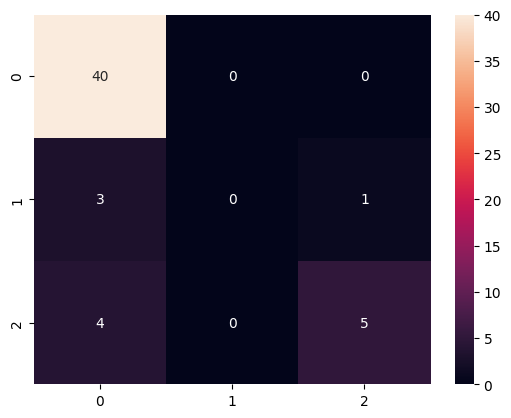

In [ ]:
cm=confusion_matrix(y_testSVC,y_predSVC)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()


# Creating ROC Curve for the Best Algorithm

In [ ]:
y=["Status","Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]
# cirrhosis1[columns] = cirrhosis1[columns].apply(le.fit_transform)

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_trainSVC)
X_test_norm=min_max_scaler.fit_transform(X_testSVC)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc

In [ ]:
classifier = SVC(random_state=102,probability=True)

# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
sv=OneVsRestClassifier(grid_search)
sv.fit(X_train_norm,y_trainSVC)
y_pred =sv.predict(X_test_norm)
pred_prob = sv.predict_proba(X_test_norm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Shape of y_test_binarized: (53, 3)
Shape of pred_prob: (53, 3)


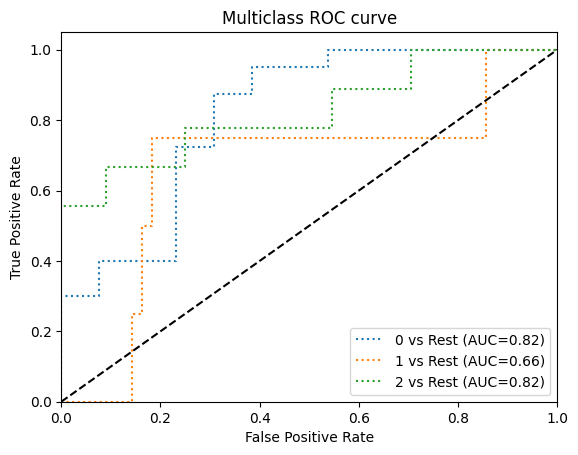

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Binarize the output
n_classes = len(np.unique(y_testSVC))
y_test_binarized = label_binarize(y_testSVC, classes=np.unique(y_testSVC))

# Predict probabilities
pred_prob = sv.predict_proba(X_test_norm)

# Print shapes for debugging
print("Shape of y_test_binarized:", y_test_binarized.shape)
print("Shape of pred_prob:", pred_prob.shape)

# Initialize dictionaries to store FPR, TPR, and ROC AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting
    plt.plot(fpr[i], tpr[i], linestyle=':' ,
             label='%s vs Rest (AUC=%0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


**Interpretation**

1.  Receiver Operating Characteristic
(ROC) Curves:

 The chart shows the ROC curves for a multiclass classification problem, where each class is compared against the rest (one-vs-rest approach).

*  **0 vs Rest**: The ROC curve for class
0 against the rest of the classes has an Area Under the Curve (AUC) of 0.82. This indicates that the classifier performs well in distinguishing class 0 from the other classes.

*  **1 vs Rest**: The ROC curve for class 1 against the rest of the classes has an AUC of 0.66. This suggests that the classifier has a moderate performance in distinguishing class 1 from the other classes.

*  **2 vs Rest**: The ROC curve for class 2 against the rest of the classes also has an AUC of 0.82, indicating a good performance in distinguishing class 2 from the other classes
.
2.  **Diagonal Line**:
The black dashed line represents a classifier that makes random predictions. Any ROC curve above this line indicates a classifier that performs better than random.

3.  **True Positive Rate vs. False Positive Rate:**

The True Positive Rate (sensitivity) measures the proportion of actual positives that are correctly identified.
The False Positive Rate measures the proportion of actual negatives that are incorrectly identified as positives.

**Overall Analysis:**

The chart provides a visual comparison of the classifier's ability to distinguish each class from the others in a multiclass classification problem. Higher AUC values indicate better performance. In this case, the classifier performs well for classes 0 and 2 (AUC=0.82) but has a moderate performance for class 1 (AUC=0.66).

# Creating the DataFrame with the Best Accuracy Values of the algorithms

In [ ]:
DataFrame={"Algorithms":["Random_Forest","Logistic_regression","SVC"],
            "Accuracy":["77.14285714285715","79.36507936507937","90.56603773584906"]}

h=pd.DataFrame(DataFrame)
h

,Algorithms,Accuracy
0,Random_Forest,77.14285714285715
1,Logistic_regression,79.36507936507937
2,SVC,90.56603773584906


# Creating the bar Plot for Best  Accuracys of the each Algorithms

<BarContainer object of 3 artists>

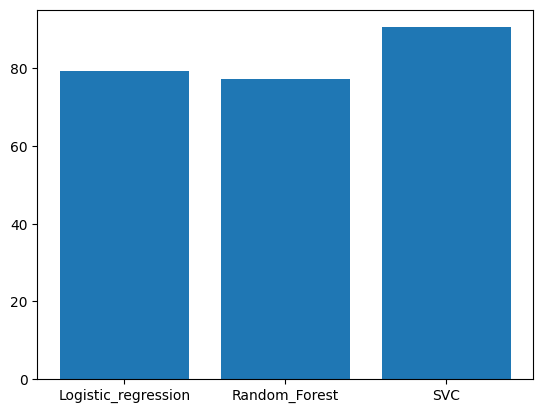

In [ ]:
data={"Logistic_regression":79.36507936507937,"Random_Forest":77.14285714285715,"SVC":90.56603773584906 }
alogithems=list(data.keys())
accuracy=list(data.values())
plt.bar(alogithems,accuracy)

The Above Bar Plot indicates that the SVC algorithms has More Accuracy compared to another algorithms i.e RandomForest Classifier and Logistic Regression

# Creating the Bar plot for the Accuracy of the all models used in Support Vector Machine

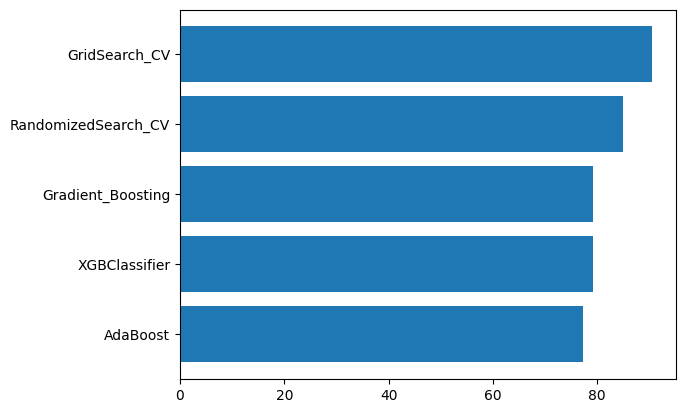

<Figure size 2000x500 with 0 Axes>

In [ ]:
data={"AdaBoost":77.35849056603774,"XGBClassifier":79.24528301886792,"Gradient_Boosting":79.24528301886792,"RandomizedSearch_CV":84.90566037735849,"GridSearch_CV":90.56603773584906 }
alogithems=list(data.keys())
accuracy=list(data.values())
plt.barh(alogithems,accuracy)
plt.figure(figsize=(20,5))
plt.tight_layout()

**Interpretation:**

*  The chart compares the performance of
five different classification algorithms based on a certain metric (likely accuracy).

*  GridSearch_CV has the highest performance, followed by RandomizedSearch_CV, which is slightly lower.

*  Gradient_Boosting and XGBClassifier have similar performances, which are slightly above 80.

*  AdaBoost has the lowest performance among the five algorithms, but it is still above 80.

**Overall Analysis:**

The bar chart effectively shows the comparison of different classification algorithms, indicating that GridSearch_CV has the best performance, followed by RandomizedSearch_CV. The other three algorithms (AdaBoost, XGBClassifier, and Gradient_Boosting) have similar and slightly lower performances.

### SUMMARY



*  The cirrhosis dataset analysis focused on evaluating various machine learning models to predict patient status based on clinical and demographic data.

*   Key features included age, sex, and liver function tests.

*   Among the models tested, the Support Vector Classifier (SVC) demonstrated the highest initial accuracy.

*   Further enhancements were achieved using boosting techniques such as AdaBoost, Gradient Boosting, and XGBoost.Hyperparameter tuning with GridSearchCV resulted in the most significant performance improvement.

*   Overall, the analysis showed that advanced models and tuning methods substantially enhanced predictive accuracy, with GridSearchCV yielding the best results.





